# Loan prediction analysis

In [61]:
#Import some necessary dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

###### Dataset information

In [2]:
# Classical example of supervised ML learning
#The overall objective of the problem is whether you are eligible for the loan or not
#Dream housing finance company deals in all home loan, They have presence across all urban, rural , semi urban area
# Loan eligibilty critera depends on the following features:
# 1:Gender
# 2:Marital status
# 3:Education
# 4:Number of dependents
# 5:loan amount 
# 6:Cardit history 
# 7:income
# 8:self employed
# 9:loan amount term
# 10:property area
# 11: Coapplication income
# 12: property area
# 13: loan status  (yes/no)  
#:Company want to automate the loan eligibility process based on the customer details
# provided while filling online application form

# Load Dataset and see some detail of the data

In [3]:
loan_dataframe = pd.read_csv("D:\DataSetfor MLandDL\Loan Prediction Dataset.csv")

In [4]:
loan_dataframe.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
loan_dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#check empty cell
loan_dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#check NaN cell
loan_dataframe.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Prepocessing the Dataset

In [9]:
# We have different type attributes or features which empty and null value

In [10]:
# First we fill missing values for numerical features
loan_dataframe['LoanAmount'] = loan_dataframe['LoanAmount'].fillna(loan_dataframe['LoanAmount'].mean())
loan_dataframe['Loan_Amount_Term'] = loan_dataframe['Loan_Amount_Term'].fillna(loan_dataframe['Loan_Amount_Term'].mean())
loan_dataframe['Credit_History'] = loan_dataframe['Credit_History'].fillna(loan_dataframe['Credit_History'].mean())

In [11]:
#2nd we fill missing values for Categorical features
loan_dataframe['Gender'] = loan_dataframe['Gender'].fillna(loan_dataframe['Gender'].mode()[0])
loan_dataframe['Married'] = loan_dataframe['Married'].fillna(loan_dataframe['Married'].mode()[0])
loan_dataframe['Dependents'] = loan_dataframe['Dependents'].fillna(loan_dataframe['Dependents'].mode()[0])
loan_dataframe['Self_Employed'] = loan_dataframe['Self_Employed'].fillna(loan_dataframe['Self_Employed'].mode()[0])

In [12]:
loan_dataframe['Gender'].mode()[0]

'Male'

In [13]:
# Again check missing value and NaN value
loan_dataframe.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
loan_dataframe.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Exploratory Data Analysis

###### Firstly I m going to perform EDA on categorical feature

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

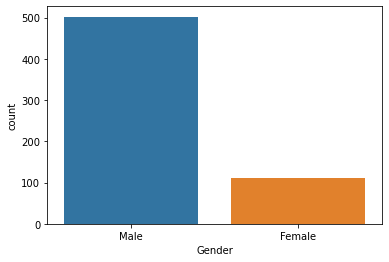

In [16]:
sns.countplot(loan_dataframe['Gender'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

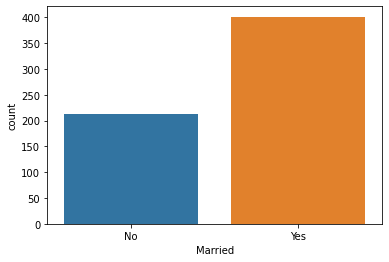

In [17]:
sns.countplot(loan_dataframe['Married'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

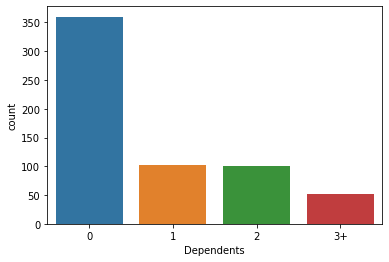

In [18]:
sns.countplot(loan_dataframe['Dependents'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

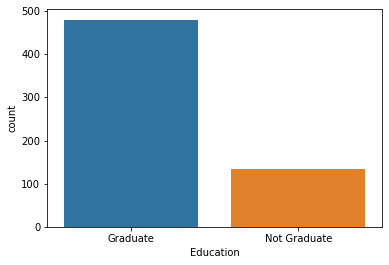

In [19]:
sns.countplot(loan_dataframe['Education'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

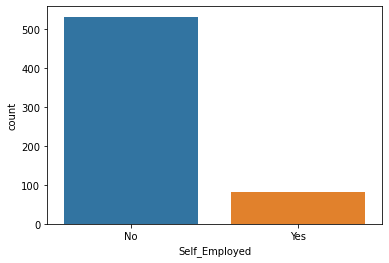

In [20]:
sns.countplot(loan_dataframe['Self_Employed'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

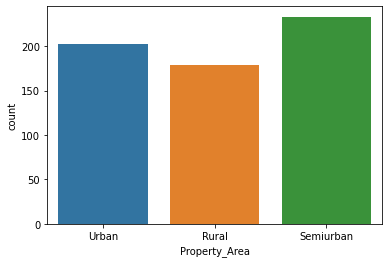

In [21]:
sns.countplot(loan_dataframe['Property_Area'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

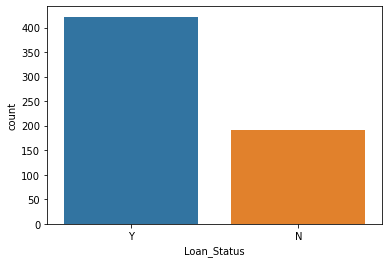

In [22]:
sns.countplot(loan_dataframe['Loan_Status'])

###### Create new attributes

In [23]:
loan_dataframe['total income'] = loan_dataframe['ApplicantIncome'] + loan_dataframe['CoapplicantIncome']
loan_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


###### Perform exploratory Data analysis on numerical feature by using distribution plot

###### Apply log transformation

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

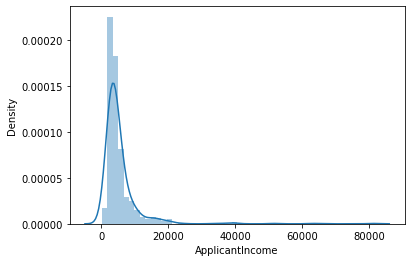

In [24]:
sns.distplot(loan_dataframe['ApplicantIncome'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Density'>

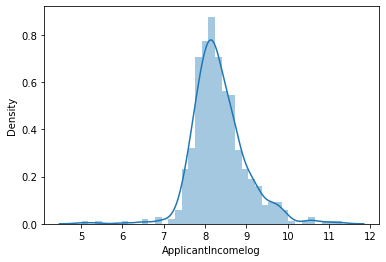

In [25]:
#Apply log tranformation to the attribute to normalized it to train model better
loan_dataframe['ApplicantIncomelog'] = np.log(loan_dataframe['ApplicantIncome'])
sns.distplot(loan_dataframe['ApplicantIncomelog'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

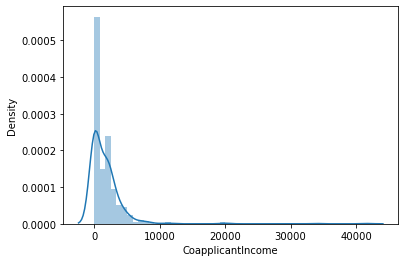

In [26]:
sns.distplot(loan_dataframe['CoapplicantIncome'])

In [27]:
loan_dataframe['CoapplicantIncome'].isna().sum()

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomelog', ylabel='Density'>

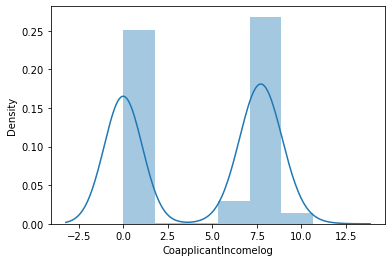

In [28]:
#Apply log tranformation to the attribute to normalized it to train model better
loan_dataframe['CoapplicantIncomelog'] = np.log(loan_dataframe['CoapplicantIncome']+1)
sns.distplot(loan_dataframe['CoapplicantIncomelog'])

In [29]:
loan_dataframe['CoapplicantIncome'].isna().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: CoapplicantIncome, dtype: bool

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

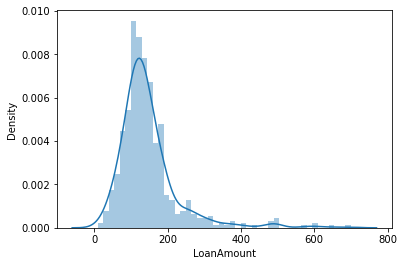

In [30]:
sns.distplot(loan_dataframe['LoanAmount'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountlog', ylabel='Density'>

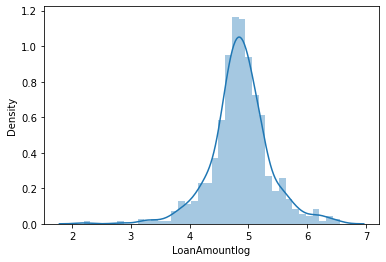

In [31]:
#Apply log tranformation to the attribute to normalized it to train model better
loan_dataframe['LoanAmountlog'] = np.log(loan_dataframe['LoanAmount']) 
sns.distplot(loan_dataframe['LoanAmountlog'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

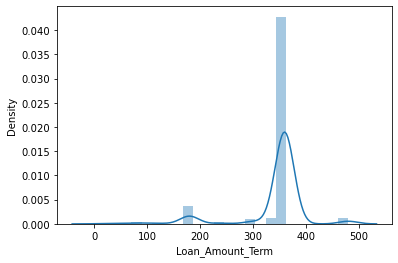

In [32]:
sns.distplot(loan_dataframe['Loan_Amount_Term'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Termlog', ylabel='Density'>

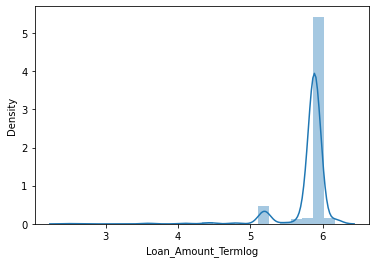

In [33]:
#Apply log tranformation to the attribute to normalized it to train model better
loan_dataframe['Loan_Amount_Termlog'] = np.log(loan_dataframe['Loan_Amount_Term']) 
sns.distplot(loan_dataframe['Loan_Amount_Termlog'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total income_log', ylabel='Density'>

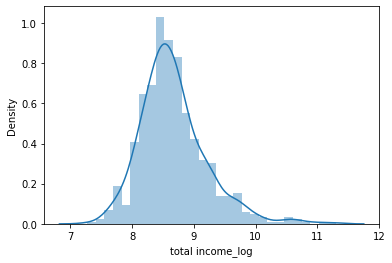

In [34]:
#Apply log tranformation to the attribute to normalized it to train model better
loan_dataframe['total income_log'] = np.log(loan_dataframe['total income']) 
sns.distplot(loan_dataframe['total income_log'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

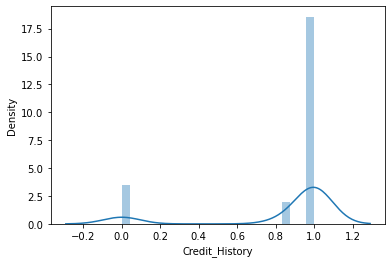

In [35]:
sns.distplot(loan_dataframe['Credit_History'])

In [36]:
loan_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


###### Correlation matrix : with the help of this matrix we can see what is the relationship b/w coloumn of the dataset

<AxesSubplot:>

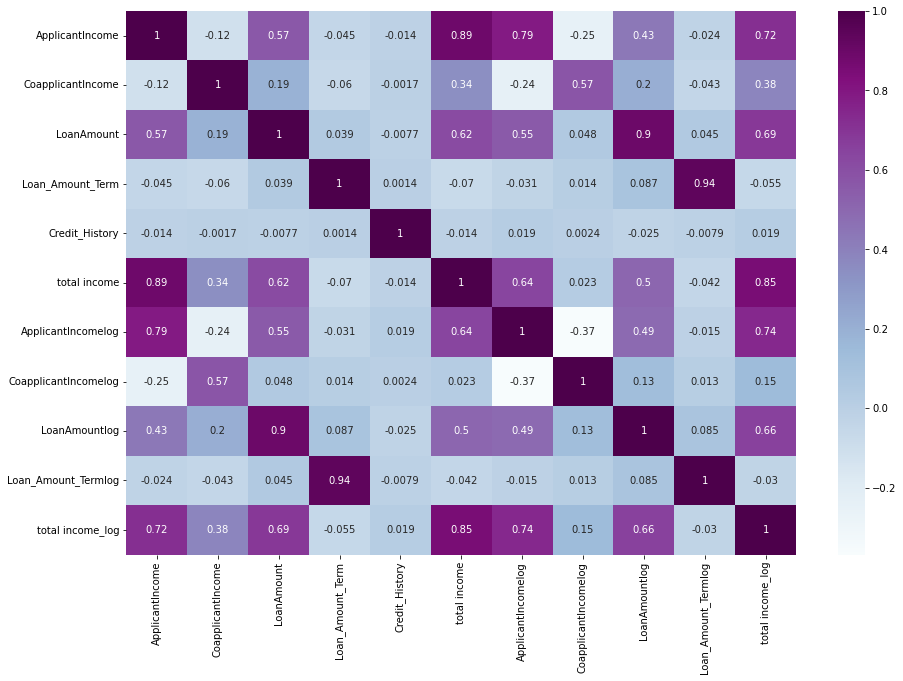

In [37]:
correlation_matrix = loan_dataframe.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True , cmap='BuPu')

In [40]:
# correlation matrix : which show relationship b/w columns or feature or attribute
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total income_log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,-0.250433,0.434849,-0.024085,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.573648,0.204179,-0.042941,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.047522,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,0.013613,0.086531,0.938871,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,0.002384,-0.025248,-0.007860,0.019156
total income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.023028,0.503817,-0.042237,0.852873
ApplicantIncomelog,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,-0.368244,0.491066,-0.014618,0.740300
CoapplicantIncomelog,-0.250433,0.573648,0.047522,0.013613,0.002384,0.023028,-0.368244,1.000000,0.130989,0.012681,0.149087
LoanAmountlog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,0.130989,1.000000,0.084534,0.657507
Loan_Amount_Termlog,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,0.012681,0.084534,1.000000,-0.029522


In [38]:
loan_dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


In [41]:
#dop unnecessary columns
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'total income', 'Loan_ID', 'CoapplicantIncomelog']
loan_dataframe = loan_dataframe.drop(columns=col, axis=1)

In [42]:
loan_dataframe.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


###### As we known that Machine only understand numbers, so we need to convert categorical feature into numerical feature by using
###### 1: one-hot-encoding, 2:label encoding

In [50]:
label_encoder = LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
    loan_dataframe[col] = label_encoder.fit_transform(loan_dataframe[col])
        

In [51]:
loan_dataframe.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [52]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int32  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    int64  
 7   Loan_Status          614 non-null    int64  
 8   ApplicantIncomelog   614 non-null    float64
 9   LoanAmountlog        614 non-null    float64
 10  Loan_Amount_Termlog  614 non-null    float64
 11  total income_log     614 non-null    float64
dtypes: float64(5), int32(1), int64(6)
memory usage: 55.3 KB


###### Train test split


In [53]:
#specify input and output
X = loan_dataframe.drop(columns=["Loan_Status"], axis=1)
Y = loan_dataframe['Loan_Status']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 42)

###### Model Training

In [58]:
#define function to reuse it for different model
def classification(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 42)
    model.fit(x_train,y_train)
    print("Accuracy: ", model.score(x_test,y_test)*100, "%")
    
    # Cross Validation: it is used for better validation of model
    # e.g: cv 5: train 4 and for test 1
    score = cross_val_score(model, X,Y ,cv=5)
    print("Cross validation score: ", np.mean(score)*100, "%")
    

In [59]:
model = LogisticRegression()
classification(model, X,Y)

Accuracy:  77.27272727272727 %
Cross validation score:  80.9462881514061 %


###### check different model accuracy:

In [60]:
model = DecisionTreeClassifier()
classification(model, X,Y)

Accuracy:  71.42857142857143 %
Cross validation score:  70.68639210982272 %


In [62]:
model = RandomForestClassifier()
classification(model, X,Y)

Accuracy:  76.62337662337663 %
Cross validation score:  78.50459816073571 %


In [63]:
model = ExtraTreesClassifier()
classification(model, X,Y)

Accuracy:  74.67532467532467 %
Cross validation score:  77.04118352658936 %


###### Hyperparamter tuning

In [67]:
model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=30, max_features=1)
classification(model, X,Y)

Accuracy:  73.37662337662337 %
Cross validation score:  79.64147674263627 %


###### Confusion matric

In [68]:
# confusion matrix is a summary of prediction results on a classification probelm
# the number of correct and incorrect predictions are summarized  with  count value and broken down by each class
model = LogisticRegression()

classification(model, X,Y)
y_pred = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

Accuracy:  77.27272727272727 %
Cross validation score:  80.9462881514061 %


array([[21, 33],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

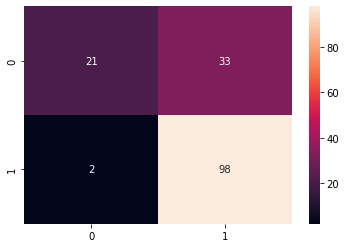

In [70]:
sns.heatmap(confusion_matrix,annot=True)